In [ ]:
#Kmeans
Kmeans remembers mean of each cluster it was fitted on, so when new samples are introduced
it simply finds nearest centroid to each new sample

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


new_points is an array of points and labels is the array of their cluster labels.

The following code will create clusters/show how many are there in data, and color them differently for different labels/clusters.

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_   #Compute the coordinates of the centroids using the .cluster_centers_ attribute of model

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]   #Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

#Make a scatter plot of centroids_x and centroids_y, 
#using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50

#Inertia and elbow point
Inertia is distance of points from their centroid. So as tight clustering is the goal, desirable inertia should be minimum.
Too high clusters - overfit
Too low clusters- High inertia and underfit/simplistic
Hence we plot inertia for variety of k=cluster numbers and plot nertia(i.e. dist of points from centroid), choose elbow point

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels   #fit_predict is the same as using fit then predict
labels = model.fit_predict(samples)

# Create a DataFrame with clusters and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})       #so label of cluster - 0,1,2 and variety of grain is in df

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])  #Using crosstab, we create a table with following structure


#varieties  Canadian wheat  Kama wheat  Rosa wheat
#    labels                                           
#    0                       0           1          60
#    1                      68           9           0
#    2                       2          60          10


##THIS GIVES US A VISUAL IDEA OF HOW CLEAR AND ACCURATE OUR CLUSTERING WAS

#SO OUT OF 70 GRAINS OF VARIETY KAMA WHEAT, 60 WERE FOUND TO BELONG TO CLUSTER 2 AND 9 IN CLUSTER 1
#SIMILARILY IN CANADIAN WHEAT, 68 WERE IN VARIETY 1, 2 WERE IN VARIETY 2
#IT IS A SIGN OF GOOD CLUSTERING BUT WE WANT TO INCREASE EVEN MORE ACCURACY 

# Display ct
print(ct)


Let us use fish measurement data sourced from the Journal of Statistics Education.

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

In [ ]:
import pandas as pd
df = pd.read_csv('fish.csv', header = None)
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


In [ ]:
# Import pandas
import pandas as pd


samples = df.iloc[: , 1:]
species = df.iloc[:, 0]   


# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)



# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


So, finally in the above chunk you see that for a species name ie our variety, particular label is 0-3 (cluster label), and so
Bream falls mainly under topic 0
smelt falls mainly under topic 1
and this cross tab things helps us visualize it this way better

Clustering stocks using KMeans
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). 

You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)         #movements is our sample data, showing daily price movements of stocks from 2010 to 2015


Which stocks move together?
In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


#Output looks like following
<script.py> output:

        labels                           companies

    59       0                               Yahoo
    15       0                                Ford
    35       0                            Navistar
    26       1                      JPMorgan Chase
    16       1                   General Electrics
    58       1                               Xerox
    11       1                               Cisco
    18       1                       Goldman Sachs
    20       1                          Home Depot
    5        1                     Bank of America
    3        1                    American express
    55       1                         Wells Fargo
    1        1                                 AIG
    38       2                               Pepsi
    40       2                      Procter Gamble
    28       2                           Coca Cola
    27       2                      Kimberly-Clark
    9        2                   Colgate-Palmolive
    54       3                            Walgreen
    36       3                    Northrop Grumman
    29       3                     Lookheed Martin
    4        3                              Boeing
    0        4                               Apple
    47       4                            Symantec
    33       4                           Microsoft
    32       4                                  3M
    31       4                           McDonalds
    30       4                          MasterCard
    50       4  Taiwan Semiconductor Manufacturing
    14       4                                Dell
    17       4                     Google/Alphabet
    24       4                               Intel
    23       4                                 IBM
    2        4                              Amazon
    51       4                   Texas instruments
    43       4                                 SAP
    45       5                                Sony
    48       5                              Toyota
    21       5                               Honda
    22       5                                  HP
    34       5                          Mitsubishi
    7        5                               Canon
    56       6                            Wal-Mart
    57       7                               Exxon
    44       7                        Schlumberger
    8        7                         Caterpillar
    10       7                      ConocoPhillips
    12       7                             Chevron
    13       7                   DuPont de Nemours
    53       7                       Valero Energy
    39       8                              Pfizer
    41       8                       Philip Morris
    25       8                   Johnson & Johnson
    49       9                               Total
    46       9                      Sanofi-Aventis
    37       9                            Novartis
    42       9                   Royal Dutch Shell
    19       9                     GlaxoSmithKline
    52       9                            Unilever
    6        9            British American Tobacco

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving eurovision-2016.csv to eurovision-2016 (1).csv


In [ ]:
import pandas as pd
Eurovision = pd.read_csv('eurovision-2016.csv', header = None)
Eurovision.head()

,0,1,2,3,4,5,6,7,8,9,10
0,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
1,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
2,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
3,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
4,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN


In [ ]:
#CODE FOR DENDOGRAM

In [ ]:

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method = 'complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


#Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

#so first read in data, understand what col is what from above chunk's text.

#RUN DENDOGRAM AND OBTAIN THE FOLLOWING CODE AND IMAGE

In [ ]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6
)
plt.show()




---

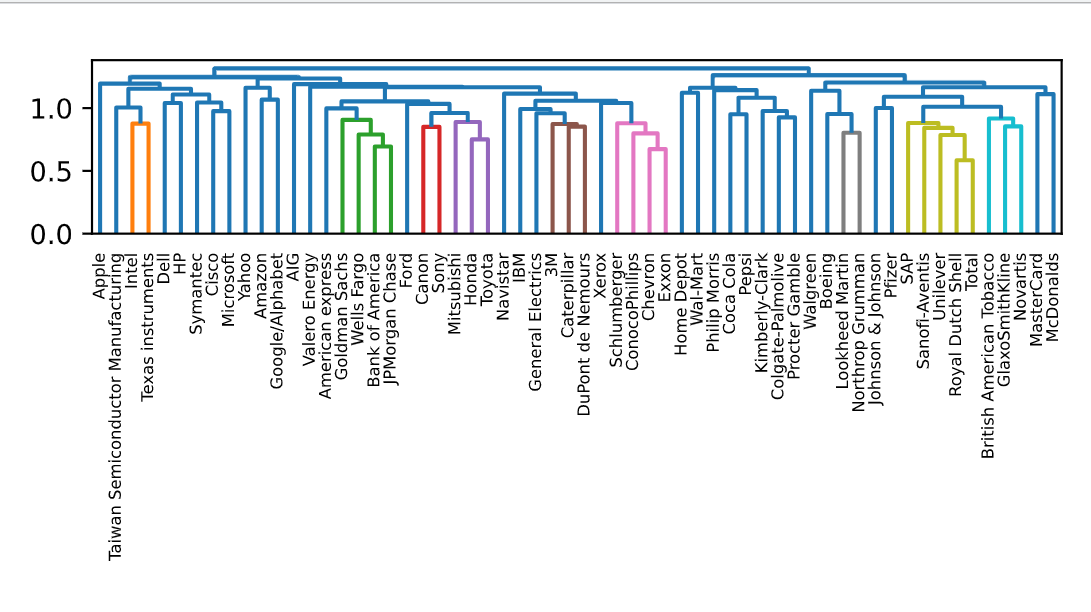

perform a hierarchical clustering of the voting countries with 'single' linkage,
You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. 

We use Eurovision data loaded before

In [ ]:
samples = Eurovision
country_names = samples[['From country']].values()
 

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


SyntaxError: ignored

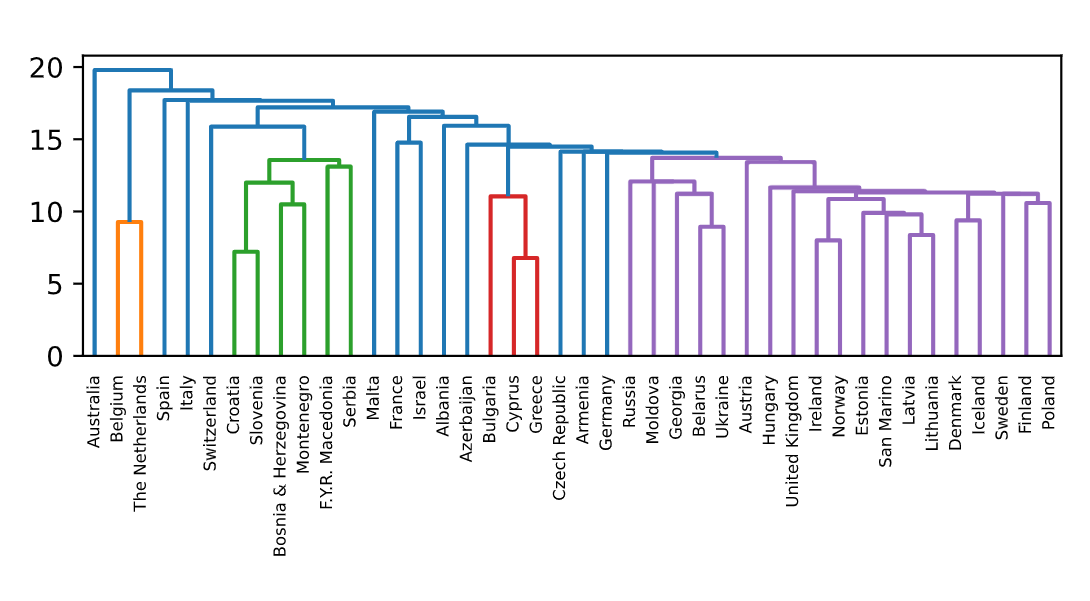

To find no of clusters at an intermediate height, 
use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

So task is, 

Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.
Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values.
Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.

In [ ]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


#TSNE

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. 

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


#PRINCIPAL COMPONENT ANALYSIS
PCA helps decorrelate and reduce data's dimesnions and keeps only imp/principal features.
It first decorrelates:
Rotates data samples to be aligned with axis 
Shifts data samples so mean is 0
Hence features are decorrelated linearly. can check with pearson correlation (-1 to 1).

Prinicpal components are directions where data varies the most

You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


Now, we'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

Intrinsic dimesion is no of features that have significant variance If any feature has not much significant variance, it doesn't explain much and is not needed.

The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, our job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for us.

In [ ]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

Output will be a graph showing in which direction is the variance highest

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. 

Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.
Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


ValueError: ignored

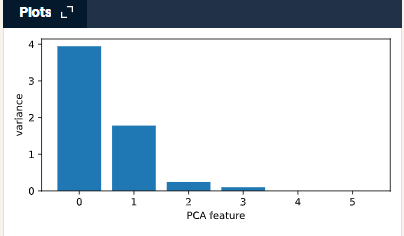

Looks like feature 0,1 have significant variance

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance with 2 components: pca
pca = PCA(n_components=2)         #hence reduced dimesions from org 4 features to 2
#by default PCA will pick first 2 features with highest variance, assuming they are the most imp

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


Import TfidfVectorizer from sklearn.feature_extraction.text.
Create a TfidfVectorizer instance called tfidf.
Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.
Inspect csr_mat by calling its .toarray() method and printing the result. This has been done for you.
The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


In [ ]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


#NMF applied to Wikipedia articles

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

In [ ]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])


NMF learns topics of documents

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


Explore the LED digits dataset

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


NMF learns the parts of images

Import NMF from sklearn.decomposition.
Create an NMF instance called model with 7 components. (7 is the number of cells in an LED display).
Apply the .fit_transform() method of model to samples. Assign the result to features.
To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.
Assign the row 0 of features to digit_features.
Print digit_features.

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

Which articles are similar to 'Cristiano Ronaldo'?

mport normalize from sklearn.preprocessing.
Apply the normalize() function to nmf_features. Store the result as norm_features.
Create a DataFrame df from norm_features, using titles as an index.
Use the .loc[] accessor of df to select the row of 'Cristiano Ronaldo'. Assign the result to article.
Apply the .dot() method of df to article to calculate the cosine similarity of every row with article.
Print the result of the .nlargest() method of similarities to display the most similiar articles. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

#Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

Import:
NMF from sklearn.decomposition.
Normalizer and MaxAbsScaler from sklearn.preprocessing.
make_pipeline from sklearn.pipeline.
Create an instance of MaxAbsScaler called scaler.
Create an NMF instance with 20 components called nmf.
Create an instance of Normalizer called normalizer.
Create a pipeline called pipeline that chains together scaler, nmf, and normalizer.
Apply the .fit_transform() method of pipeline to artists. Assign the result to norm_features.

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [ ]:
#Recommend musical artists part II
Suppose you were a big fan of Bruce Springsteen - 
which other musicial artists might you like? Use your NMF features from the previous exercise and 
the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, 
so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

Import pandas as pd.
Create a DataFrame df from norm_features, using artist_names as an index.
Use the .loc[] accessor of df to select the row of 'Bruce Springsteen'. Assign the result to artist.
Apply the .dot() method of df to artist to calculate the dot product of every row with artist. Save the result as similarities.
Print the result of the .nlargest() method of similarities to display the artists most similar to 'Bruce Springsteen'.

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())
